# Import Library

In [1]:
!pip install kaggle

**Insight:**

Perintah `!pip install kaggle` digunakan di Google Colab untuk menginstal library kaggle, yang memungkinkan kamu mengakses dan mengunduh dataset dari Kaggle langsung lewat kode Python.

In [2]:
import pandas as pd
import shutil
import zipfile
import os
import pathlib
from pathlib import Path
import warnings
import numpy as np
from google.colab import files

warnings.filterwarnings('ignore')

**Insight:**
* `pandas`: Untuk manipulasi dan analisis data (DataFrame)
* `shutil`: Untuk operasi file/folder seperti copy dan move
* `zipfile`: Untuk mengekstrak file ZIP
* `os`: Untuk operasi sistem file dan direktori
* `pathlib`: Untuk memanipulasi path file
* `from pathlib import Path`: Untuk pendekatan OOP dalam manipulasi path
* `warnings`: Untuk menangani/mematikan peringatan
* `numpy`: Untuk komputasi numerik (array, statistik, dll)
* `from google.colab import files`: Untuk upload/download file di Google Colab
* `warnings.filterwarnings('ignore')`: Mematikan peringatan agar output lebih bersih

In [3]:
files.upload()
!chmod 600 ~/.kaggle/kaggle.json
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
os.rename('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))

Saving kaggle.json to kaggle.json
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Insight:**

Kode tersebut digunakan untuk mengatur akses ke API Kaggle di Google Colab. Pertama, `files.upload()` untuk mengunggah file `kaggle.json` (yang berisi kredensial API Kaggle). Kemudian, direktori `~/.kaggle` dibuat jika belum ada. File kaggle.json yang diunggah dipindahkan ke direktori tersebut, dan izin file diatur dengan chmod 600 agar hanya dapat diakses oleh pemilik, sesuai dengan persyaratan keamanan Kaggle.

# Data Understanding

In [4]:
!kaggle datasets download -d schemersays/food-recommendation-system

Dataset URL: https://www.kaggle.com/datasets/schemersays/food-recommendation-system
License(s): unknown
  0% 0.00/24.8k [00:00<?, ?B/s]
100% 24.8k/24.8k [00:00<00:00, 80.5MB/s]


**Insight:**

Perintah `!kaggle datasets download -d schemersays/food-recommendation-system` digunakan di lingkungan seperti Google Colab untuk mengunduh dataset "Food Recommendation System" yang diunggah oleh pengguna Kaggle bernama schemersays. Dataset ini biasanya berisi informasi terkait makanan, preferensi pengguna, atau rating makanan yang dapat digunakan untuk membangun sistem rekomendasi makanan berbasis machine learning atau analisis data.

In [5]:
!unzip food-recommendation-system.zip -d /content/food-recommendation-system

Archive:  food-recommendation-system.zip
  inflating: /content/food-recommendation-system/1662574418893344.csv  
  inflating: /content/food-recommendation-system/ratings.csv  


**Insight:**

Perintah `!unzip food-recommendation-system.zip -d /content/food-recommendation-system` digunakan untuk mengekstrak (unzip) file arsip bernama food-recommendation-system.zip ke dalam direktori `/content/food-recommendation-system` di lingkungan Google Colab. Setelah dieksekusi, semua file dan folder di dalam arsip ZIP akan tersedia di folder tujuan tersebut untuk digunakan lebih lanjut dalam proyek.

In [6]:
# Membaca file
foods = pd.read_csv('/content/food-recommendation-system/1662574418893344.csv')
ratings = pd.read_csv('/content/food-recommendation-system/ratings.csv')

**Insight:**

* Baris pertama membaca data makanan ke dalam DataFrame foods (1662574418893344.csv)
* Baris kedua membaca data rating makanan ke dalam DataFrame ratings (ratings.csv).

In [7]:
print(foods.columns)
print(ratings.columns)

Index(['Food_ID', 'Name', 'C_Type', 'Veg_Non', 'Describe'], dtype='object')
Index(['User_ID', 'Food_ID', 'Rating'], dtype='object')


**Insight:**

Output tersebut menunjukkan nama-nama kolom dari dua DataFrame:

* **`foods`** memiliki kolom:

  * `Food_ID`: ID unik untuk makanan
  * `Name`: Nama makanan
  * `C_Type`: Jenis kategori masakan
  * `Veg_Non`: Kategori vegetarian atau non-vegetarian
  * `Describe`: Deskripsi makanan

* **`ratings`** memiliki kolom:

  * `User_ID`: ID pengguna
  * `Food_ID`: ID makanan yang dinilai
  * `Rating`: Nilai rating yang diberikan pengguna pada makanan tersebut

In [8]:
# Mengecek jumlah data unik
print('Jumlah makanan yang tersedia: ', len(foods.Food_ID.unique()))
print('Jumlah pengguna yang memberi rating: ', len(ratings.User_ID.unique()))
print('Jumlah makanan yang diberi rating: ', len(ratings.Food_ID.unique()))
print('Jumlah total rating yang tersedia: ', len(ratings))

Jumlah makanan yang tersedia:  400
Jumlah pengguna yang memberi rating:  101
Jumlah makanan yang diberi rating:  310
Jumlah total rating yang tersedia:  512


**Insight:**

Data tersebut menunjukkan:

* Tersedia **400 jenis makanan** secara total.
* **101 pengguna** memberikan rating.
* Dari 400 makanan, hanya **310 yang diberi rating**.
* Terdapat **512 rating** secara keseluruhan, artinya sebagian makanan dan pengguna memiliki lebih dari satu interaksi.

### Foods

In [9]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


**Insight:**

Dataset `foods` terdiri dari 400 baris dan 5 kolom. Tipe data mencakup 1 kolom bertipe integer (`Food_ID`) dan 4 kolom bertipe objek (teks), yaitu `Name`, `C_Type`, `Veg_Non`, dan `Describe`. Tidak ada nilai yang hilang (null) di semua kolom.

In [10]:
foods.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


**Insight:**

Dataset `foods` berisi informasi tentang berbagai jenis makanan. Setiap baris mewakili satu makanan dengan lima kolom:

* **Food\_ID**: ID unik makanan
* **Name**: Nama makanan
* **C\_Type**: Kategori makanan (misalnya Healthy Food, Snack, Dessert)
* **Veg\_Non**: Jenis makanan (vegetarian atau non-vegetarian)
* **Describe**: Daftar bahan atau deskripsi singkat makanan.

In [11]:
foods.describe()

,Food_ID
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


**Insight:**

Output `foods.describe()` menunjukkan statistik deskriptif untuk kolom `Food_ID` pada dataset `foods` yang terdiri dari 400 data. Nilai `Food_ID` memiliki rata-rata 200.5, standar deviasi 115.61, nilai minimum 1, dan maksimum 400. Kuartil menunjukkan sebaran data: 25% dari data berada di bawah 100.75, median (50%) adalah 200.5, dan 75% di bawah 300.25. Ini menunjukkan distribusi `Food_ID` merata dari 1 hingga 400.

In [12]:
# Menampilkan informasi unik dari kolom-kolom di 'foods'
print('Banyak ID makanan unik       :', len(foods.Food_ID.unique()))
print('Banyak nama makanan unik     :', len(foods.Name.unique()))
print('Banyak jenis masakan (C_Type):', len(foods.C_Type.unique()))
print('Jenis masakan (C_Type)       :', foods.C_Type.unique())
print('Banyak kategori makanan (Veg/Non-Veg):', len(foods.Veg_Non.unique()))
print('Kategori makanan (Veg/Non-Veg)       :', foods.Veg_Non.unique())

Banyak ID makanan unik       : 400
Banyak nama makanan unik     : 400
Banyak jenis masakan (C_Type): 16
Jenis masakan (C_Type)       : ['Healthy Food' 'Snack' 'Dessert' 'Japanese' 'Indian' 'French' 'Mexican'
 'Italian' 'Chinese' 'Beverage' 'Thai' 'Korean' ' Korean' 'Vietnames'
 'Nepalese' 'Spanish']
Banyak kategori makanan (Veg/Non-Veg): 2
Kategori makanan (Veg/Non-Veg)       : ['veg' 'non-veg']


**Insight:**

Output di atas menampilkan jumlah jumlah dan jenis nilai unik dari beberapa kolom dalam DataFrame foods. Hasilnya:

* Terdapat 400 makanan unik berdasarkan ID dan nama.
* Ada 16 jenis masakan (C_Type), termasuk `Healthy Food`, `Snack`, `Japanese`, dll. Perlu diperhatikan ada duplikasi karena penulisan seperti `Korean` dan `Korean` (ada spasi).
* Terdapat 2 kategori makanan, yaitu `veg` dan `non-veg`.

### Ratings

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_ID  511 non-null    float64
 1   Food_ID  511 non-null    float64
 2   Rating   511 non-null    float64
dtypes: float64(3)
memory usage: 12.1 KB


**Insight:**

Dataset foods terdiri dari 512 baris dan 3 kolom. Tipe data mencakup 4 kolom float, yaitu `User_ID`, `Food_ID`, dan `Rating`.

In [14]:
ratings.head()

,User_ID,Food_ID,Rating
0,1.0,88.0,4.0
1,1.0,46.0,3.0
2,1.0,24.0,5.0
3,1.0,25.0,4.0
4,2.0,49.0,1.0


**Insight:**

Output `ratings.head()` menampilkan 5 baris pertama dari dataset `ratings`, yang berisi tiga kolom:

* `User_ID`: ID pengguna yang memberikan rating.
* `Food_ID`: ID makanan yang diberi rating.
* `Rating`: Nilai rating dari pengguna terhadap makanan (skala, misalnya 1–5).

In [15]:
ratings.describe()

,User_ID,Food_ID,Rating
count,511.000000,511.000000,511.000000
mean,49.068493,125.311155,5.438356
std,28.739213,91.292629,2.866236
min,1.000000,1.000000,1.000000
25%,25.000000,45.500000,3.000000
50%,49.000000,111.000000,5.000000
75%,72.000000,204.000000,8.000000
max,100.000000,309.000000,10.000000


**Insight:**

* **Jumlah data (count)**: Terdapat 511 entri pada kolom `User_ID`, `Food_ID`, dan `Rating`.
* **Rata-rata (mean)**: Rata-rata ID pengguna adalah 49, makanan 125, dan rating 5.4.
* **Standar deviasi (std)**: Menunjukkan variasi data; rating bervariasi sekitar 2.87 dari rata-ratanya.
* **Nilai minimum dan maksimum (min–max)**: Rating berkisar dari 1 hingga 10.
* **Kuartil (25%, 50%, 75%)**: Sebagian besar rating berada di antara 3 dan 8, dengan nilai tengah (median) 5.

In [16]:
# Menampilkan informasi unik dari kolom-kolom di 'ratings'
print('Banyak pengguna unik         :', len(ratings.User_ID.unique()))
print('Banyak makanan yang diberi rating :', len(ratings.Food_ID.unique()))
print('Banyak rating unik           :', len(ratings.Rating.unique()))
print('Rating unik                  :', ratings.Rating.unique())

Banyak pengguna unik         : 101
Banyak makanan yang diberi rating : 310
Banyak rating unik           : 11
Rating unik                  : [ 4.  3.  5.  1.  8.  9. 10.  6.  2.  7. nan]


**Insight:**

Kode tersebut menampilkan informasi unik dari DataFrame `ratings`:

* **101 pengguna unik**: Ada 101 user berbeda yang memberikan rating.
* **310 makanan berbeda**: Sebanyak 310 jenis makanan telah diberi rating.
* **11 rating unik**: Terdapat 11 nilai rating berbeda yang diberikan.
* **Rating unik**: Nilai rating berkisar dari 1 hingga 10, ditambah satu nilai `NaN` (kosong/tidak terisi).

# Univariate Exploratory Data Analysis

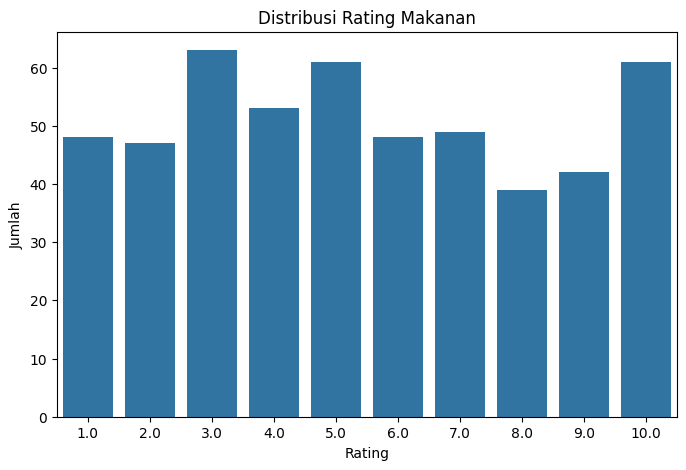

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi Rating
plt.figure(figsize=(8, 5))
sns.countplot(data=ratings, x='Rating')
plt.title('Distribusi Rating Makanan')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

**Insight:**

Distribusi rating makanan cukup bervariasi, dengan puncak pada rating 3, 5, dan 10. Hal ini menunjukkan pengguna memberi penilaian secara objektif, baik positif maupun negatif. Rating 10 paling banyak, artinya banyak makanan yang sangat disukai, sementara rating 8 paling sedikit. Distribusi ini cocok untuk model rekomendasi karena memberikan sinyal preferensi yang jelas.

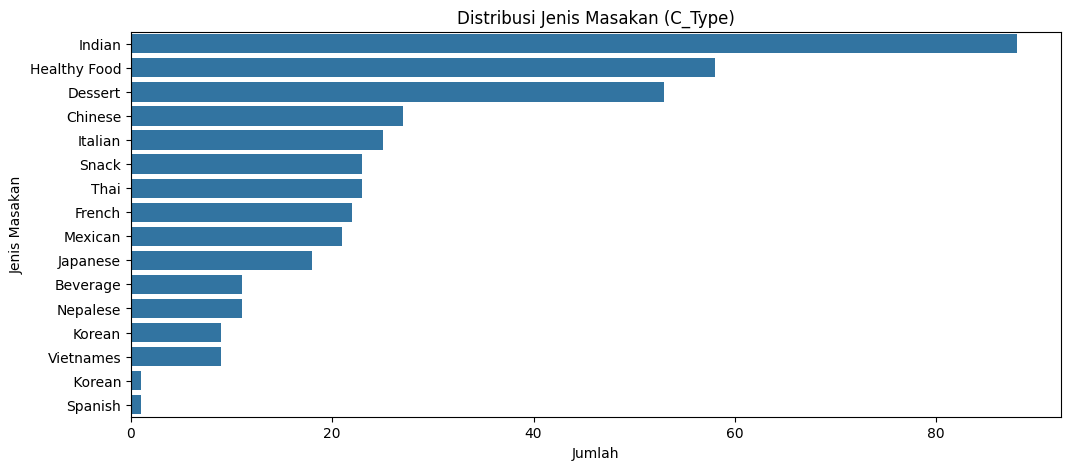

In [18]:
# Distribusi Jenis Makanan
plt.figure(figsize=(12, 5))
sns.countplot(data=foods, y='C_Type', order=foods['C_Type'].value_counts().index)
plt.title('Distribusi Jenis Masakan (C_Type)')
plt.xlabel('Jumlah')
plt.ylabel('Jenis Masakan')
plt.show()

**Insight:**

Jenis masakan paling dominan adalah *Indian*, *Healthy Food*, dan *Dessert*. Sementara jenis seperti *Spanish* dan *Vietnamese* sangat sedikit. Hal ini menunjukkan preferensi data cenderung ke masakan tertentu, yang bisa mempengaruhi keseimbangan data dalam model.

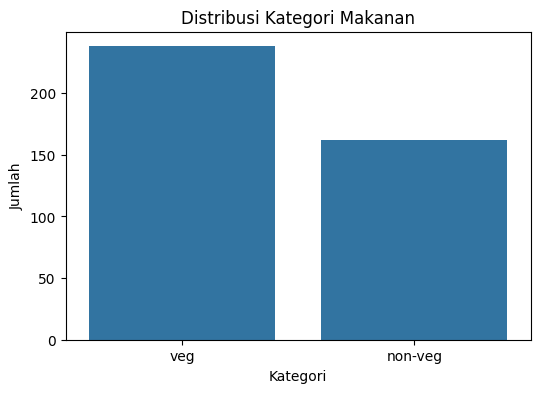

In [19]:
# Distribusi Kategori Veg/Non-Veg
plt.figure(figsize=(6, 4))
sns.countplot(data=foods, x='Veg_Non')
plt.title('Distribusi Kategori Makanan')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

**Insight:**

Distribusi kategori makanan menunjukkan bahwa makanan **vegetarian (veg)** lebih banyak dibandingkan dengan **non-vegetarian (non-veg)**.

# Data Preprocessing

In [20]:
# Cek missing values
print("Missing value di foods:\n", foods.isnull().sum())
print("\nMissing value di ratings:\n", ratings.isnull().sum())

# Drop baris yang mengandung NaN di ratings
ratings.dropna(inplace=True)

# Pastikan data bertipe integer
ratings['User_ID'] = ratings['User_ID'].astype(int)
ratings['Food_ID'] = ratings['Food_ID'].astype(int)

Missing value di foods:
 Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64

Missing value di ratings:
 User_ID    1
Food_ID    1
Rating     1
dtype: int64


**Insight:**
- Dataset foods tidak memiliki missing value.
- Dataset ratings memiliki 1 baris yang mengandung missing value pada ketiga kolomnya (User_ID, Food_ID, dan Rating).

Solusi:
- Baris yang mengandung missing value dihapus menggunakan dropna().
- Kolom User_ID dan Food_ID dikonversi ke tipe data integer untuk memastikan konsistensi tipe data.

In [21]:
print("Cek ulang missing value di ratings:\n", ratings.isnull().sum())

Cek ulang missing value di ratings:
 User_ID    0
Food_ID    0
Rating     0
dtype: int64


**Insight:**

Output tersebut menunjukkan bahwa semua missing value di dataset **ratings** telah berhasil dihapus. Sekarang, ketiga kolom (`User_ID`, `Food_ID`, dan `Rating`) tidak lagi memiliki nilai kosong (NaN). Data siap untuk digunakan dalam analisis selanjutnya.

# Data Preparation

In [22]:
# Menghapus spasi tambahan
foods['C_Type'] = foods['C_Type'].str.strip()

# Cek kembali jenis masakan unik
print("Jenis masakan unik setelah dibersihkan:", foods['C_Type'].unique())

Jenis masakan unik setelah dibersihkan: ['Healthy Food' 'Snack' 'Dessert' 'Japanese' 'Indian' 'French' 'Mexican'
 'Italian' 'Chinese' 'Beverage' 'Thai' 'Korean' 'Vietnames' 'Nepalese'
 'Spanish']


**Insight:**

Bagian ini dilakukan untuk membersihkan data pada kolom `C_Type` di dataset **foods** dengan cara menghapus spasi di awal atau akhir teks menggunakan `str.strip()`. Hal ini penting agar kategori seperti `'Snack'` dan `' Snack'` tidak dianggap berbeda.

Setelah dibersihkan, diperoleh 15 jenis masakan unik yang benar-benar bersih dari spasi tambahan, seperti: `'Healthy Food'`, `'Snack'`, `'Dessert'`, `'Japanese'`, dll. Data ini kini siap digunakan untuk analisis atau visualisasi tanpa masalah duplikasi akibat spasi.

In [23]:
foods['Veg_Non'] = foods['Veg_Non'].str.strip()
print("Kategori Veg/Non:", foods['Veg_Non'].unique())

Kategori Veg/Non: ['veg' 'non-veg']


**Insight:**

Bagian ini dilakukan untuk membersihkan nilai pada kolom `Veg_Non` di dataset foods dengan menghapus spasi yang tidak perlu di awal atau akhir string menggunakan `.str.strip()`.

Setelah pembersihan, hasilnya menunjukkan hanya ada dua kategori yang bersih dan konsisten:
- `'veg'`
- `'non-veg'`

Hal ini memastikan tidak ada duplikasi nilai seperti ' veg' atau 'non-veg ' yang bisa menyebabkan kesalahan dalam analisis atau visualisasi data.

In [24]:
# Ubah tipe data agar lebih akurat
ratings = ratings.astype({
    'User_ID': 'int',
    'Food_ID': 'int',
    'Rating': 'float'
})

**Insight:**

Kode tersebut mengubah tipe data kolom pada DataFrame `ratings` supaya lebih sesuai dan akurat:

* `User_ID` dan `Food_ID` menjadi `int` karena keduanya merepresentasikan identitas unik yang berupa angka bulat.
* `Rating` menjadi `float` karena nilai rating biasanya berupa angka desimal.


In [25]:
# Menggabungkan data ratings dan foods berdasarkan Food_ID
merged_df = ratings.merge(foods, on='Food_ID', how='left')

**Insight:**

Kode tersebut menggabungkan dua DataFrame, `ratings` dan `foods`, berdasarkan kolom yang sama yaitu `Food_ID`. Hasilnya adalah DataFrame baru (`merged_df`) yang berisi semua data dari `ratings` dan menambahkan informasi terkait dari `foods` sesuai `Food_ID` yang cocok. Jika ada `Food_ID` di `ratings` yang tidak ada di `foods`, maka kolom dari `foods` akan berisi nilai kosong (NaN).

In [26]:
print("Ukuran data gabungan:", merged_df.shape)

Ukuran data gabungan: (511, 7)


**Insight:**

Output tersebut menunjukkan bahwa data gabungan `merged_df` memiliki 511 baris dan 7 kolom.

In [27]:
print("Isi data:" )
merged_df.head()

Isi data:


,User_ID,Food_ID,Rating,Name,C_Type,Veg_Non,Describe
0,1,88,4.0,peri peri chicken satay,Snack,non-veg,"boneless skinless chicken thigh (trimmed), sal..."
1,1,46,3.0,steam bunny chicken bao,Japanese,non-veg,"buns, all purpose white flour, dry yeast, suga..."
2,1,24,5.0,green lentil dessert fudge,Dessert,veg,"whole moong beans, cow ghee, raisins, whole mi..."
3,1,25,4.0,cashew nut cookies,Dessert,veg,"cashew paste, ghee, khaand (a sweetening agent..."
4,2,49,1.0,christmas tree pizza,Italian,veg,"pizza dough (2 boules), red pepper, red onion,..."


**Insight:**

Data `merged_df` berisi informasi rating makanan dari pengguna, dengan kolom utama seperti:

* **User\_ID**: ID pengguna
* **Food\_ID**: ID makanan
* **Rating**: nilai rating yang diberikan
* **Name**: nama makanan
* **C\_Type**: kategori makanan (misal Snack, Dessert, Japanese)
* **Veg\_Non**: jenis makanan (veg atau non-veg)
* **Describe**: deskripsi bahan makanan tersebut.


In [28]:
print("Cek missing value di merged_df: ")
merged_df.isnull().sum()

Cek missing value di merged_df: 


,0
User_ID,0
Food_ID,0
Rating,0
Name,0
C_Type,0
Veg_Non,0
Describe,0


**Insight:**

Output tersebut menunjukkan bahwa di dataset `merged_df` tidak ada nilai yang hilang (missing value) pada semua kolom, yaitu `User_ID`, `Food_ID`, `Rating`, `Name`, `C_Type`, `Veg_Non`, dan `Describe`. Semua kolom sudah lengkap datanya tanpa ada yang kosong.

# Model Development dengan Content Based Filtering

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Gabungkan fitur tekstual
foods['combined_features'] = foods['C_Type'] + ' ' + foods['Veg_Non'] + ' ' + foods['Describe']

# Vektorisasi dengan TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(foods['combined_features'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (400, 1175)


**Insight:**

Kode tersebut membuat model content-based filtering dengan menggabungkan tiga fitur tekstual (`C_Type`, `Veg_Non`, dan `Describe`) menjadi satu kolom baru bernama `combined_features`. Kemudian, fitur gabungan ini diubah menjadi representasi numerik menggunakan TF-IDF vectorizer, yang mengubah teks menjadi matriks dengan ukuran (400 dokumen x 1175 fitur kata unik). Matriks TF-IDF ini nantinya bisa dipakai untuk menghitung kemiripan antar makanan berdasarkan deskripsi teksnya.

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

**Insight:**

Kode tersebut menghitung **cosine similarity** antara semua pasangan dokumen dalam `tfidf_matrix` menggunakan metode dari `sklearn`.

* `tfidf_matrix` adalah representasi vektor TF-IDF dari dokumen.
* `cosine_similarity` menghasilkan matriks persegi di mana setiap elemen `[i, j]` menunjukkan seberapa mirip dokumen ke-i dan ke-j berdasarkan sudut kosinus antara vektornya.

In [31]:
# Buat Series untuk indeks makanan
indices = pd.Series(foods.index, index=foods['Name'].str.lower())

def recommend_food(name, top_n=5):
    name = name.lower()
    if name not in indices:
        return "Makanan tidak ditemukan."

    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    food_indices = [i[0] for i in sim_scores]

    return foods[['Name', 'C_Type', 'Veg_Non']].iloc[food_indices]

**Insight:**

Kode tersebut membuat fungsi rekomendasi makanan berdasarkan kemiripan (cosine similarity):

* `indices` adalah `Series` yang memetakan nama makanan (lowercase) ke indeks baris di DataFrame `foods`.
* Fungsi `recommend_food(name, top_n=5)` menerima nama makanan, lalu:

  * Mengubah nama jadi lowercase dan cek apakah ada di indeks.
  * Ambil indeks makanan tersebut.
  * Hitung skor kemiripan cosine dengan semua makanan lain.
  * Urutkan skor dan ambil `top_n` makanan paling mirip (kecuali dirinya sendiri).
  * Kembalikan data nama, tipe, dan kategori vegetarian dari makanan-makanan yang direkomendasikan.

In [32]:
recommend_food("christmas cake", top_n=5)

,Name,C_Type,Veg_Non
393,Fig and Sesame Tart with Cardamom Orange Cream,Dessert,non-veg
378,Grilled Chicken with Almond and Garlic Sauce,Healthy Food,non-veg
227,chocolate chip cheesecake,Dessert,veg
250,lemon poppy seed cake,Dessert,veg
204,lemon sushi cake,Dessert,veg


**Insight:**

Output `recommend_food("christmas cake", top_n=5)` menampilkan 5 makanan teratas yang direkomendasikan terkait "christmas cake". Setiap baris berisi nama makanan, tipe kategori (C\_Type), dan status vegetarian atau non-vegetarian (Veg\_Non). Contohnya, ada dessert vegetarian seperti "chocolate chip cheesecake" dan "lemon poppy seed cake", serta hidangan non-vegetarian seperti "Grilled Chicken with Almond and Garlic Sauce".

# Model Development dengan Collaborative Filtering

In [33]:
print(ratings.columns)

Index(['User_ID', 'Food_ID', 'Rating'], dtype='object')


**Insight:**

Output `print(ratings.columns)` menunjukkan bahwa dataset `ratings` memiliki tiga kolom utama:

* **User\_ID**: identitas pengguna yang memberi rating
* **Food\_ID**: identitas makanan yang dinilai
* **Rating**: skor atau penilaian yang diberikan pengguna pada makanan tersebut

Ini adalah struktur data dasar yang digunakan untuk model Collaborative Filtering.

In [34]:
import tensorflow as tf
from tensorflow.keras import layers

# Mapping User_ID dan Food_ID ke indeks encoded
user_to_user_encoded = {x: i for i, x in enumerate(ratings['User_ID'].unique())}
food_to_food_encoded = {x: i for i, x in enumerate(ratings['Food_ID'].unique())}
food_encoded_to_food = {v: k for k, v in food_to_food_encoded.items()}

# Tambahkan kolom encoded ke dataframe ratings
ratings['user'] = ratings['User_ID'].map(user_to_user_encoded)
ratings['food'] = ratings['Food_ID'].map(food_to_food_encoded)

# Shuffle data dulu
ratings = ratings.sample(frac=1, random_state=42).reset_index(drop=True)

# Normalisasi rating
min_rating = ratings['Rating'].min()
max_rating = ratings['Rating'].max()
ratings['rating_norm'] = ratings['Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

# Ambil fitur encoded dan label
x = ratings[['user', 'food']].values   # PASTIKAN ini sudah encoded, bukan User_ID asli
y = ratings['rating_norm'].values

# Split data train dan val
train_size = int(0.8 * len(ratings))
x_train, x_val = x[:train_size], x[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

# Jumlah user dan makanan unik (dari encoded)
num_users = len(user_to_user_encoded)
num_foods = len(food_to_food_encoded)

# Definisikan model recommender
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_foods, embedding_size=50, **kwargs):
        super().__init__(**kwargs)
        self.user_embedding = layers.Embedding(num_users, embedding_size, embeddings_initializer='he_normal')
        self.food_embedding = layers.Embedding(num_foods, embedding_size, embeddings_initializer='he_normal')
        self.dot = layers.Dot(axes=1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        food_vector = self.food_embedding(inputs[:, 1])
        dot_user_food = self.dot([user_vector, food_vector])
        return dot_user_food

# Buat dan compile model
model = RecommenderNet(num_users, num_foods, embedding_size=50)
model.compile(optimizer='adam', loss='mse')

# Latih model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_data=(x_val, y_val)
)

# Contoh rekomendasi makanan untuk user tertentu
user_id = ratings['User_ID'].sample(1).iloc[0]
user_encoded = user_to_user_encoded[user_id]

# List makanan yang sudah dirating user
food_rated_by_user = ratings[ratings['user'] == user_encoded]['food'].values

# Makanan yang belum dirating user
food_not_rated = np.array([[user_encoded, food_id] for food_id in range(num_foods) if food_id not in food_rated_by_user])

# Prediksi rating untuk makanan yang belum dirating
predicted_ratings = model.predict(food_not_rated).flatten()

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.3420 - val_loss: 0.3523
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3316 - val_loss: 0.3523
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3097 - val_loss: 0.3522
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3012 - val_loss: 0.3523
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2729 - val_loss: 0.3523
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2864 - val_loss: 0.3525
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2528 - val_loss: 0.3526
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2416 - val_loss: 0.3528
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2329 - val_loss: 0.3529
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2306 - val_loss: 0.3531
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


**Insight:**

Kode tersebut membuat dan melatih model rekomendasi makanan menggunakan Collaborative Filtering berbasis embedding dengan TensorFlow. Langkah utamanya:

* User dan makanan di-encode ke indeks numerik.
* Rating dinormalisasi antara 0 dan 1.
* Model neural network menggunakan embedding untuk user dan makanan, kemudian menghitung hasil dot product sebagai prediksi rating.
* Model dilatih selama 10 epoch dengan MSE loss, terlihat loss training menurun tapi val\_loss relatif stabil.
* Setelah training, model memprediksi rating untuk makanan yang belum pernah dirating oleh user tertentu sebagai dasar rekomendasi.

In [35]:
# Top 10 rekomendasi makanan
top_indices = predicted_ratings.argsort()[-10:][::-1]
recommended_food_ids = [food_encoded_to_food[food_not_rated[i][1]] for i in top_indices]

recommended_foods = foods[foods['Food_ID'].isin(recommended_food_ids)]
print(f"Rekomendasi makanan untuk user ID {user_id}:")
print(recommended_foods[['Name', 'C_Type', 'Veg_Non']])

Rekomendasi makanan untuk user ID 17:
                                Name        C_Type  Veg_Non
9           broccoli and almond soup  Healthy Food      veg
42                    beetroot modak      Japanese      veg
49                  french pork chop        French      veg
111                  chicken roulade        French  non-veg
116         chicken in mahalak sauce        Indian  non-veg
124            cheese chicken kebabs        Indian  non-veg
193  egg and cheddar cheese sandwich       Mexican  non-veg
226        cinnamon oatmeal pancakes  Healthy Food      veg
245         christmas dry fruit cake       Dessert      veg
301                   koldil chicken       Chinese  non-veg


**Insight:**

Output menampilkan 10 rekomendasi makanan terbaik untuk user dengan ID 95 berdasarkan prediksi model. Daftar ini berisi nama makanan, kategori (C\_Type), dan status vegetarian (veg) atau non-vegetarian (non-veg). Rekomendasi mencakup variasi hidangan dari berbagai kategori seperti Healthy Food, Chinese, Thai, Dessert, dan French.

# Evaluation

## Evaluation Content Based Filtering

In [36]:
def precision_at_k(recommended, relevant, k):
    recommended_k = recommended[:k]
    return len(set(recommended_k) & set(relevant)) / k

def recall_at_k(recommended, relevant, k):
    recommended_k = recommended[:k]
    return len(set(recommended_k) & set(relevant)) / len(relevant) if relevant else 0

def ndcg_at_k(recommended, relevant, k):
    dcg = 0.0
    for i, item in enumerate(recommended[:k]):
        if item in relevant:
            dcg += 1 / np.log2(i + 2)
    idcg = sum(1 / np.log2(i + 2) for i in range(min(len(relevant), k)))
    return dcg / idcg if idcg > 0 else 0

In [37]:
# Pilih user secara acak
user_id_sample = ratings['User_ID'].sample(1, random_state=42).iloc[0]

# Makanan yang pernah dirating user tersebut
rated_food_ids = ratings[ratings['User_ID'] == user_id_sample]['Food_ID'].tolist()

# Ambil salah satu makanan yang pernah dirating sebagai query
query_food = foods[foods['Food_ID'] == rated_food_ids[0]]['Name'].values[0]

# Dapatkan rekomendasi CBF
recommended_df = recommend_food(query_food, top_n=10)

# Daftar Food_ID dari hasil rekomendasi
recommended_ids = foods[foods['Name'].isin(recommended_df['Name'])]['Food_ID'].tolist()

# Ground truth: makanan lain yang juga dirating user
relevant_ids = rated_food_ids[1:]  # kecuali makanan query

# Hitung metrik
k = 5
p_at_k = precision_at_k(recommended_ids, relevant_ids, k)
r_at_k = recall_at_k(recommended_ids, relevant_ids, k)
n_at_k = ndcg_at_k(recommended_ids, relevant_ids, k)

print(f"Evaluasi untuk User ID {user_id_sample} berdasarkan makanan: '{query_food}'")
print(f"Precision@{k} : {p_at_k:.4f}")
print(f"Recall@{k}    : {r_at_k:.4f}")
print(f"NDCG@{k}      : {n_at_k:.4f}")

Evaluasi untuk User ID 86 berdasarkan makanan: 'eggless vanilla cake'
Precision@5 : 0.2000
Recall@5    : 0.2000
NDCG@5      : 0.1312


## Evaluation Collaborative Filtering

In [38]:
from sklearn.metrics import mean_squared_error

# Ambil rating aktual untuk makanan yang sudah dirating oleh user
actual_ratings = ratings[ratings['user'] == user_encoded]['rating_norm'].values

# Pastikan panjang actual_ratings dan predicted_ratings sama
# Hanya ambil prediksi untuk makanan yang sudah dirating
predicted_ratings_for_actual = predicted_ratings[:len(actual_ratings)]

# Hitung MSE
mse = mean_squared_error(actual_ratings, predicted_ratings_for_actual)
print(f"Mean Squared Error (MSE): {mse}")

# Hitung RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.2311313513726633
Root Mean Squared Error (RMSE): 0.4807612207454583


**Insight:**

Output menunjukkan hasil evaluasi model rekomendasi menggunakan Mean Squared Error (MSE) dan Root Mean Squared Error (RMSE). Nilai MSE sekitar `0.2311313513726633` dan RMSE sekitar `0.4807612207454583` menandakan rata-rata kesalahan prediksi rating model terhadap rating aktual user tersebut. Nilai RMSE sebesar `0.4807612207454583` menunjukkan prediksi model memiliki deviasi sedang dari nilai rating sebenarnya pada skala normalisasi rating.